In [44]:
# Titanic Dataset
# 1. Find the correlation between Ã¢Â€Â˜survivedÃ¢Â€Â™ (target column) and Ã¢Â€Â˜sexÃ¢Â€Â™ column for the Titanic use case in class. 
# 	a. Do you think we should keep this feature? 
# 2. Do at least two visualizations to describe or show correlations.  
# 3. Implement NaÃƒÂ¯ve Bayes method using scikit-learn library and report the accuracy. 

In [46]:
import pandas as pd #to read datasets
import seaborn as sns #to visualize
import matplotlib.pyplot as plt #to visualize

In [47]:
#evaluation imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
df=pd.read_csv("train.csv")

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577553

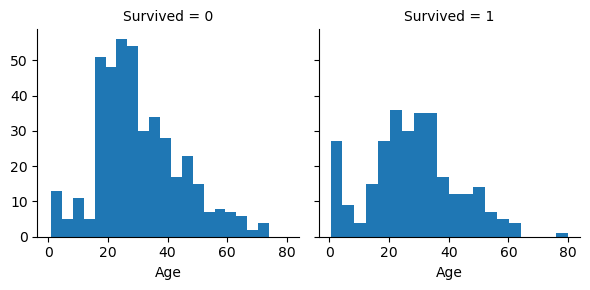

In [53]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [52]:
matrix = df.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

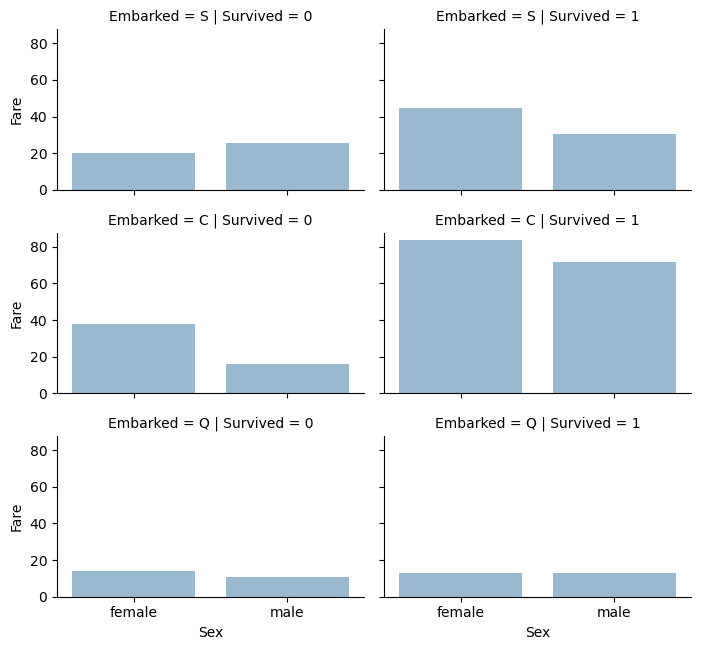

In [54]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [55]:
X_train = train.drop(['Name', 'Ticket', 'Cabin','Parch','SibSp', 'PassengerId', 'Survived'], axis=1)
Y_train = train['Survived']

In [56]:
print(X_train.isnull())

     Pclass    Sex    Age   Fare  Embarked
0     False  False  False  False     False
1     False  False  False  False     False
2     False  False  False  False     False
3     False  False  False  False     False
4     False  False  False  False     False
..      ...    ...    ...    ...       ...
886   False  False  False  False     False
887   False  False  False  False     False
888   False  False   True  False     False
889   False  False  False  False     False
890   False  False  False  False     False

[891 rows x 5 columns]


In [57]:
print(X_train.isnull().sum())

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [58]:
#fill missing values in age
meanAge = int(X_train.Age.dropna().mean())
X_train['Age'] = X_train['Age'].fillna(meanAge)

In [59]:
#fill missing values in embarked and map to numerical
common_value = 'S'

X_train['Embarked'] = X_train['Embarked'].fillna(common_value)

ports = {"S": 0, "C": 1, "Q": 2}

X_train['Embarked'] = X_train['Embarked'].map(ports)

In [60]:
#convert sex to numerical
X_train['Sex'] = X_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [65]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [66]:
test = pd.read_csv("test.csv")
X_test = test.drop(['Name', 'Ticket', 'Cabin','Parch','SibSp', 'PassengerId'], axis=1)
X_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [67]:
print(X_test.isnull().sum())

Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64


In [68]:
#fill missing values in age
X_test['Age'] = X_test['Age'].fillna(meanAge)#using mean from train set

In [69]:
#fill missing values in fare
X_test['Fare'] = X_test['Fare'].fillna(X_train['Fare'].dropna().median())

In [70]:
#map to numerical
ports = {"S": 0, "C": 1, "Q": 2}

X_test['Embarked'] = X_test['Embarked'].map(ports)

In [71]:
#convert sex to numerical
X_test['Sex'] = X_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [72]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0


In [73]:
df.corr().style.background_gradient(cmap="Greens")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


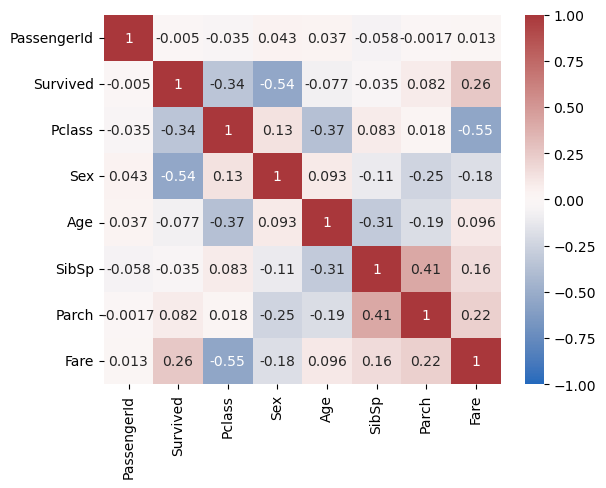

In [74]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [75]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       549
           1       0.70      0.72      0.71       342

    accuracy                           0.78       891
   macro avg       0.76      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891

[[445 104]
 [ 95 247]]
accuracy is 0.77665544332211


In [76]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       549
           1       0.64      0.48      0.55       342

    accuracy                           0.70       891
   macro avg       0.68      0.65      0.66       891
weighted avg       0.69      0.70      0.68       891

[[457  92]
 [179 163]]
accuracy is 0.6958473625140292


In [77]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

[[468  81]
 [109 233]]
accuracy is 0.7867564534231201


In [78]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, Y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_train, y_train_pred))
print(confusion_matrix(Y_train, y_train_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_train_pred,Y_train))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       549
           1       0.64      0.48      0.55       342

    accuracy                           0.70       891
   macro avg       0.68      0.66      0.66       891
weighted avg       0.69      0.70      0.69       891

[[455  94]
 [177 165]]
accuracy is 0.6958473625140292


In [79]:
# # Question 2
# 1. Implement NaÃƒÂ¯ve Bayes method using scikit-learn library. 
# 	a. Use the glass dataset available in Link also provided in your assignment.
# 	b. Use train_test_split to create training and testing part. 
# 2. Evaluate the model on testing part using score and Classification Report

In [81]:
glass=pd.read_csv("glass.csv")

In [82]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [83]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [84]:
X = glass.iloc[:, :-1].values
Y = glass.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [85]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [86]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         6

    accuracy                           0.37        43
   macro avg       0.22      0.33      0.23        43
weighted avg       0.33      0.37      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [87]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.27      0.89      0.41         9
           2       0.29      0.11      0.15        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.35        43
   macro avg       0.23      0.30      0.23        43
weighted avg       0.30      0.35      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
accuracy is 0.3488372093023256


In [88]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, Y_train)

y_test_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_test_pred))
print(confusion_matrix(Y_test, y_test_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_test_pred,Y_test))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.40        43
   macro avg       0.42      0.50      0.41        43
weighted avg       0.23      0.40      0.27        43

[[ 9  0  0  0  0  0]
 [17  0  0  0  1  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.3953488372093023


In [89]:
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


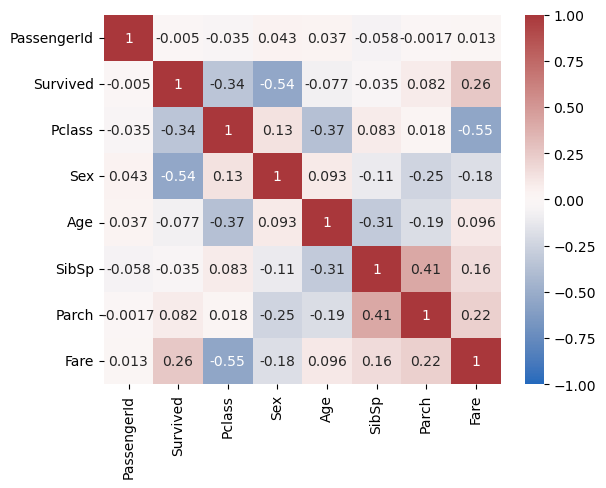

In [90]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [91]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [92]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.48      1.00      0.65        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.70        43
   macro avg       0.25      0.32      0.27        43
weighted avg       0.58      0.70      0.61        43

[[18  1  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.6976744186046512
